Epoch[100/10000, Loss: 21.9396
Epoch[200/10000, Loss: 4.3764
Epoch[300/10000, Loss: 3.2138
Epoch[400/10000, Loss: 2.6382
Epoch[500/10000, Loss: 2.5496
Epoch[600/10000, Loss: 2.5024
Epoch[700/10000, Loss: 2.4736
Epoch[800/10000, Loss: 2.4483
Epoch[900/10000, Loss: 2.4208
Epoch[1000/10000, Loss: 2.4007
Epoch[1100/10000, Loss: 2.3835
Epoch[1200/10000, Loss: 2.3989
Epoch[1300/10000, Loss: 2.3896
Epoch[1400/10000, Loss: 2.3455
Epoch[1500/10000, Loss: 2.3883
Epoch[1600/10000, Loss: 2.3474
Epoch[1700/10000, Loss: 2.3201
Epoch[1800/10000, Loss: 2.3427
Epoch[1900/10000, Loss: 2.3028
Epoch[2000/10000, Loss: 2.3283
Epoch[2100/10000, Loss: 2.4323
Epoch[2200/10000, Loss: 2.2992
Epoch[2300/10000, Loss: 2.4216
Epoch[2400/10000, Loss: 2.3256
Epoch[2500/10000, Loss: 2.3787
Epoch[2600/10000, Loss: 2.4409
Epoch[2700/10000, Loss: 2.6020
Epoch[2800/10000, Loss: 2.4779
Epoch[2900/10000, Loss: 2.4866
Epoch[3000/10000, Loss: 2.3288
Epoch[3100/10000, Loss: 2.3730
Epoch[3200/10000, Loss: 2.2901
Epoch[3300/10000

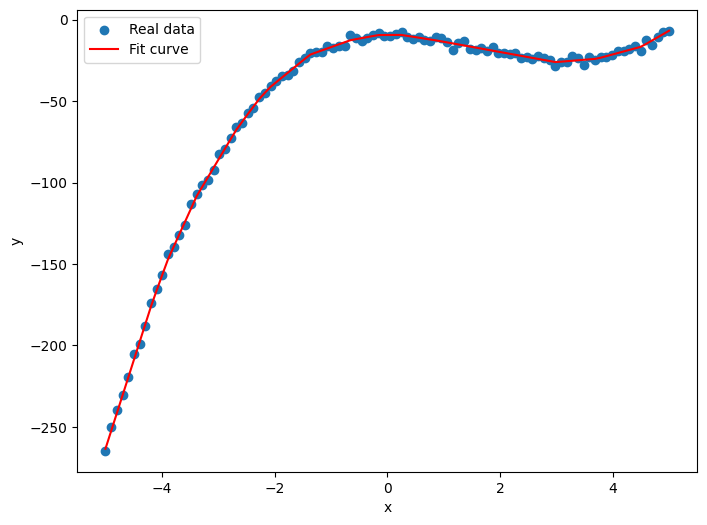

In [25]:
#----------------------------------------------------------------
# As Practice 2-1 , generate random data  for 
# a cubic function x**3 - 5*x**2 + x - 10  
# 
# Use neural network to fit he model and compare the loss 
# with Practice 2-1, (set epochs to be 10000)
#----------------------------------------------------------------
import torch
import numpy as np 
import matplotlib.pyplot as plt 
from torch import nn 
torch.manual_seed(16)

# Generate random data for a quadratic function 
# x**3 - 5*x**2 + x - 10 
def generate_cubic_data(num_samples):
    x = torch.linspace(-5, 5, num_samples)
    y = x**3 - 5*x**2 + x - 10  + torch.randn(num_samples)*2
    return x, y

# hyperparameters
learning_rate = 0.09
num_epochs = 10000
loss_list = []

# define model 
model = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
            )

# define loss function 
criterion = nn.MSELoss()
# define the optimizer 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# generate data 
num_samples = 100 
x, y = generate_cubic_data(num_samples=num_samples)

for epoch in range(num_epochs): 
    # forward pass 
    y_preds = model(x.unsqueeze(1))

    # calu loss
    loss = criterion(y_preds, y.unsqueeze(1))

    # Backprob and optimization 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0 :
        loss_list.append(loss.detach().item())
        print(f'Epoch[{epoch+1}/{num_epochs}, Loss: {loss.item():.4f}') 

    

# Plot the fitted curve 
model.eval()
with torch.no_grad():
    x_test = torch.linspace(-5, 5 , 100)
    y_pred = model(x_test.unsqueeze(1))

plt.figure(figsize=(8,6))
plt.scatter(x.numpy(), y.numpy(), label='Real data')
plt.plot(x_test.numpy(), y_pred.numpy(),'r-', label='Fit curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



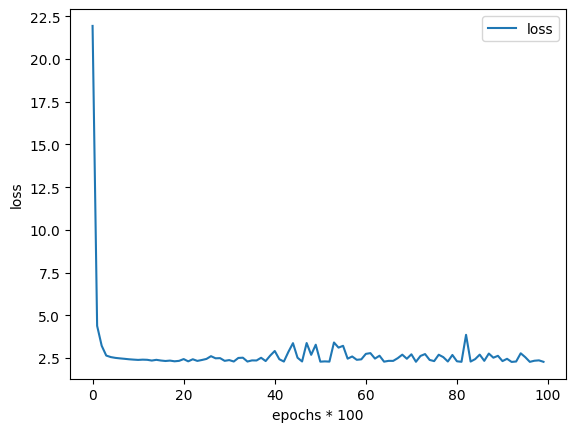

In [30]:
#plt.ylim((0,10))
plt.plot(loss_list , label='loss')
plt.xlabel('epochs * 100')
plt.ylabel('loss')
plt.legend()
plt.show()